## Self Organizing Maps.
Reference Notebook - Part of deep learning course Udemy.

In [1]:
# Mega Case Study - Make a Hybrid Deep Learning Model



# Part 1 - Identify the Frauds with the Self-Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [28]:
dataset.Class.value_counts()

0    383
1    307
Name: Class, dtype: int64

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM


In [3]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing Results

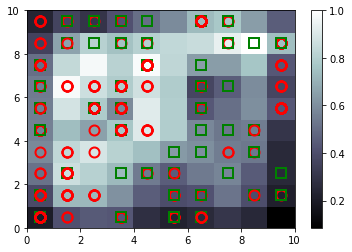

In [4]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Frauds

In [5]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)


In [34]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Keras api

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])




## Compile

In [38]:
# Fitting the ANN to the Training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(customers, y, test_size=0.33, random_state=42)
history = classifier.fit(X_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
462/462 [==============================] - 1s 3ms/step - loss: 0.7869 - acc: 0.5325
Epoch 2/5
462/462 [==============================] - 1s 3ms/step - loss: 0.4339 - acc: 0.5823
Epoch 3/5
462/462 [==============================] - 1s 3ms/step - loss: 0.3394 - acc: 0.9372
Epoch 4/5
462/462 [==============================] - 1s 3ms/step - loss: 0.2779 - acc: 0.9675
Epoch 5/5
462/462 [==============================] - 1s 3ms/step - loss: 0.2297 - acc: 0.9935


## Predicting Frauds

In [39]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(X_test)
#_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
#y_pred = y_pred[y_pred[:, 1].argsort()]

## Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred>.5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       137
           1       0.99      0.97      0.98        91

   micro avg       0.98      0.98      0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228

